In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data
salary = pd.read_csv(r"Salary_Data.csv")

In [3]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#let's check shape of the dataset
salary.shape

(30, 2)

In [5]:
#Let's check some oinformation of dataset
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
#let's check if some null values are there
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#Let's see statistical overview
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### EDA

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

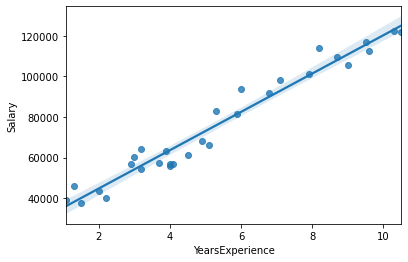

In [8]:
#let's plot reg 
sns.regplot(x='YearsExperience',y='Salary',data=salary)

from above we can cleary see the linear realtionship b/w experiance and salary

In [9]:
#Let's check correlation
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

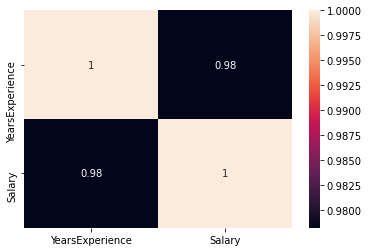

In [10]:
#heatmap
sns.heatmap(salary.corr(),annot=True)

In [11]:
#create X and y
X = salary['YearsExperience']
y=salary['Salary']

In [12]:
#let's split the dataset
import sklearn
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state = 100)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21,)
(9,)
(21,)
(9,)


## Let's Build the Model using statsmodel


In [14]:
import statsmodels.api as sm

In [15]:
#let's first add constant 
X_train_sm = sm.add_constant(X_train)

In [16]:
X_train_sm

,const,YearsExperience
17,1.0,5.3
22,1.0,7.9
11,1.0,4.0
4,1.0,2.2
29,1.0,10.5
0,1.0,1.1
1,1.0,1.3
18,1.0,5.9
14,1.0,4.5
19,1.0,6.0


In [17]:
#create an object
lr_model= sm.OLS(y_train,X_train_sm).fit()


In [18]:
#let's see the summary
lr_model.params

const              25202.887786
YearsExperience     9731.203838
dtype: float64

In [19]:
#let's see the summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           9.91e-14
Time:                        12:37:44   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387      8.765      0.000    1.92e+04    3.12e+04
YearsExperience  9731.2038    517.993     18.786      0.000    8647.033    1.08e+04
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#let's find residual but before we need to to predict y_train
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
0      35907.212008
1      37853.452776
18     82616.990432
14     68993.305058
19     83590.110816
21     94294.435038
2      39799.693544
20     91375.073886
10     63154.582755
16     74832.027361
15     72885.786594
23    104998.759260
7      56342.740069
3      44665.295463
24    109864.361179
8      56342.740069
dtype: float64

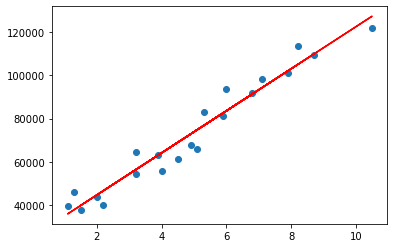

In [21]:
## above thing can be done like below too
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()


## Residual Analysis

In [22]:
#residual
res_train = y_train - y_train_pred
res_train

17     6309.731871
22     -777.398108
11    -8333.703139
4     -6720.536230
29    -5508.528088
0      3435.787992
1      8351.547224
18    -1253.990432
14    -7882.305058
19    10349.889184
21     3978.564962
2     -2068.693544
20      362.926114
10       63.417245
16    -8803.027361
15    -4947.786594
23     8813.240740
7     -1897.740069
3     -1140.295463
24     -433.361179
8      8102.259931
dtype: float64

C:\Users\khandal\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


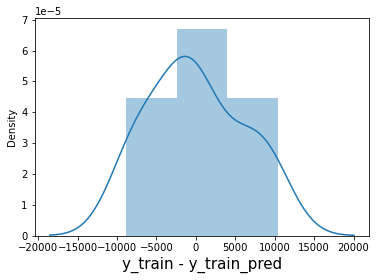

In [23]:
#let's check this normally distributed 
sns.distplot(res_train)
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

### Let's check is there any pattern in the residual

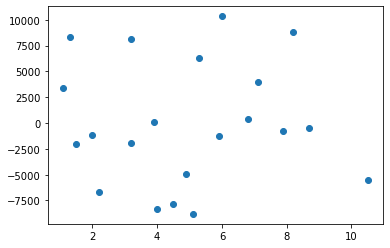

In [24]:
plt.scatter(X_train,res_train)

## Prediction on Test data set

In [25]:
#adding the constant in Test data set
X_test_sm = sm.add_constant(X_test)

In [26]:
#predicting the model
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

9      61208.341988
26    117649.324249
28    125434.287320
13     65100.823523
5      53423.378917
12     64127.703139
27    118622.444633
25    112783.722330
6      54396.499301
dtype: float64

### Evalauation of Model

need to calculate R2-square

In [27]:
from sklearn.metrics import r2_score

#r-square for test set
r2_test = r2_score(y_test,y_test_pred)
r2_test

0.962766868547327

In [28]:
#r-square for train set
r2_train = r2_score(y_train,y_train_pred)
r2_train

0.9489148127897334

### Building the model Using the Sklearn

In [29]:
#create X and y
X_lm = salary['YearsExperience']
y_lm=salary['Salary']

In [30]:
#X_train_lm,X_test_lm,y_train_lm,y_test_lm = train_test_split(X_lm,y_lm,train_size =0.7)
X_train_lm,X_test_lm,y_train_lm,y_test_lm = train_test_split(X_lm,y_lm,train_size=0.7,test_size=0.3,random_state = 100)

In [31]:
#creating the object
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

lm = LinearRegression()
# Fit the model using lr.fit()
lm.fit(X_train_lm,y_train_lm)


LinearRegression()

In [32]:
#let's see the parameters
print(lm.coef_)
print(lm.intercept_)

[9731.20383825]
25202.887786154883


In [33]:
#let's do the prediction for our test set which is our goal too
y_test_pred = lm.predict(X_test_lm)

In [34]:
y_test_pred

array([ 61208.34198766, 117649.32424949, 125434.28732008,  65100.82352296,
        53423.37891707,  64127.70313914, 118622.44463331, 112783.72233036,
        54396.49930089])

In [35]:
#evaluation on train and test set
r2_squared_test = r2_score(y_test_lm,y_test_pred)

In [36]:
r2_squared_test

0.9627668685473267

In [37]:
#for training set
r2_squared_train = r2_score(y_train,y_train_pred)
r2_squared_train

0.9489148127897334